Python codes for chapter 11 (Vector Spaces).

Chapter 11: Vector Spaces

Example 1: Linear Independence Test
Vectors: [array([1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]
Linearly independent? False

Example 2: Find Basis
Basis for span: [array([1, 2, 3]), array([4, 5, 6])]

Example 3: Coordinates with Respect to Basis
Coordinates of [2 3 4] w.r.t. basis: [0.66666667 0.33333333]

Example 4: Dimension of Span
Dimension of span: 2

Example 5: Visualize Span in 2D


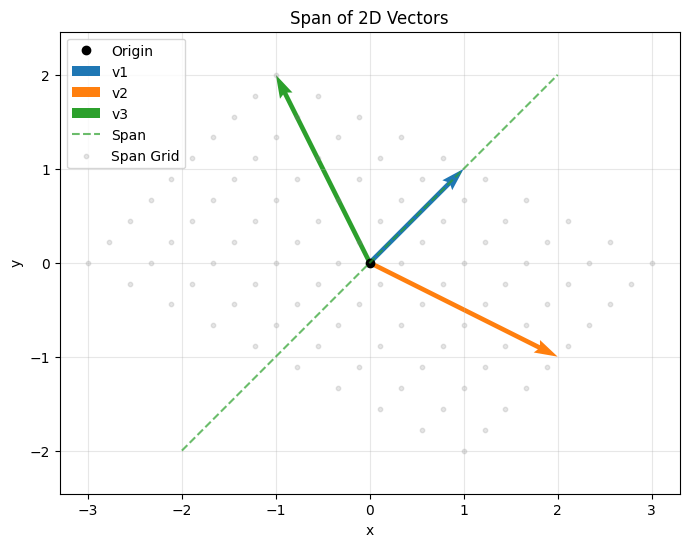


Example 6: Visualize Span in 3D


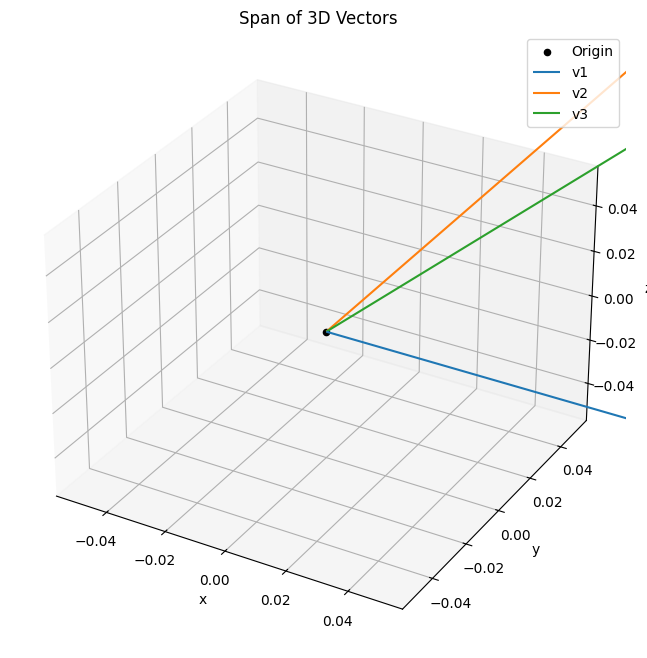

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

# Suppress warnings for small eigenvalues
warnings.filterwarnings('ignore', category=DeprecationWarning)

def is_subspace(vectors, tol=1e-10):
    """
    Approximate test: Check if a set of vectors forms a subspace.
    Tests: nonempty, closed under a*u + v for random a, u, v in the set.
    """
    if len(vectors) == 0:
        return False

    # Test closure under scalar multiplication and addition
    n = len(vectors[0])  # dimension
    for _ in range(10):  # Test with 10 random combinations
        # Randomly pick two vectors from the set
        idx1, idx2 = np.random.choice(len(vectors), size=2, replace=True)
        u, v = vectors[idx1], vectors[idx2]

        # Random scalar
        a = np.random.uniform(-10, 10)

        # Compute a*u + v
        w = a * u + v

        # Check if w is approximately in the span of the original vectors
        V = np.array(vectors).T  # columns are vectors
        try:
            # Solve V @ x = w
            _, residuals, rank, _ = np.linalg.lstsq(V, w, rcond=None)
            if np.linalg.norm(residuals) > tol:
                return False  # Not closed
        except:
            return False

    return True

def is_linearly_independent(vectors, tol=1e-10):
    """
    Check if a list of vectors is linearly independent.
    Uses SVD to compute rank.
    """
    if len(vectors) == 0:
        return True
    V = np.array(vectors).T  # each vector is a column
    rank = np.linalg.matrix_rank(V, tol=tol)
    return rank == len(vectors)

def find_basis(vectors, tol=1e-10):
    """
    Find a maximal linearly independent subset (basis for the span).
    Uses QR decomposition for numerical stability.
    """
    if len(vectors) == 0:
        return []
    V = np.array(vectors).T  # columns are vectors
    Q, R = np.linalg.qr(V)

    # Find pivot columns (nonzero diagonal in R)
    pivots = []
    for i in range(R.shape[1]):
        if np.abs(R[i,i]) > tol:
            pivots.append(i)

    basis_indices = [i for i in pivots]
    return [vectors[i] for i in basis_indices]

def coordinates_with_respect_to_basis(v, basis, tol=1e-10):
    """
    Compute coordinates of vector v with respect to basis.
    Solves A @ x = v, where A has basis vectors as columns.
    Returns None if v is not in the span.
    """
    if len(basis) == 0:
        raise ValueError("Basis is empty")
    A = np.array(basis).T  # columns are basis vectors
    if A.shape[0] != len(v):
        raise ValueError("Vector dimension mismatch")

    # Solve A @ x = v
    try:
        x, residuals, rank, s = np.linalg.lstsq(A, v, rcond=None)
        if np.linalg.norm(residuals) > tol:
            print(f"Warning: Vector {v} is not in the span of the basis (residuals={residuals})")
            return None
        return x
    except:
        return None

def dimension_of_span(vectors, tol=1e-10):
    """
    Return the dimension of the span of a list of vectors.
    """
    if len(vectors) == 0:
        return 0
    V = np.array(vectors).T  # columns are vectors
    return np.linalg.matrix_rank(V, tol=tol)

def visualize_span_2d(vectors, title="Span of Vectors"):
    """
    Plot the span of 2D vectors.
    """
    if len(vectors) == 0:
        return
    vectors = np.array(vectors)
    if vectors.shape[1] != 2:
        raise ValueError("Vectors must be 2D for visualization.")

    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot origin
    ax.plot(0, 0, 'ko', label='Origin')

    # Plot each vector
    for i, v in enumerate(vectors):
        ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1,
                 color=f'C{i}', label=f'v{i+1}')

    # If we have at least one vector, plot its span (line through origin)
    if len(vectors) >= 1:
        v = vectors[0]
        # Create a line through origin in direction of v
        t = np.linspace(-2, 2, 100)
        line_x = t * v[0]
        line_y = t * v[1]
        ax.plot(line_x, line_y, '--', color=f'C{len(vectors)-1}', alpha=0.7, label='Span')

    # If we have two vectors, plot their span (plane)
    if len(vectors) >= 2:
        # Use SVD to check if they are independent
        V = np.array(vectors).T
        if np.linalg.matrix_rank(V) == 2:
            # They span the plane; plot a grid
            t1, t2 = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
            grid_points = t1[:, :, None] * vectors[0][None, None, :] + t2[:, :, None] * vectors[1][None, None, :]
            ax.scatter(grid_points[:, :, 0], grid_points[:, :, 1], c='gray', alpha=0.2, s=10, label='Span Grid')

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('equal')
    plt.show()

def visualize_span_3d(vectors, title="Span of Vectors"):
    """
    Plot the span of 3D vectors.
    """
    if len(vectors) == 0:
        return
    vectors = np.array(vectors)
    if vectors.shape[1] != 3:
        raise ValueError("Vectors must be 3D for visualization.")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot origin
    ax.scatter(0, 0, 0, c='k', label='Origin')

    # Plot each vector
    for i, v in enumerate(vectors):
        ax.quiver(0, 0, 0, v[0], v[1], v[2], length=1, normalize=False, color=f'C{i}', label=f'v{i+1}')

    # If we have one vector, plot its span (line)
    if len(vectors) == 1:
        v = vectors[0]
        t = np.linspace(-2, 2, 100)
        line_x = t * v[0]
        line_y = t * v[1]
        line_z = t * v[2]
        ax.plot(line_x, line_y, line_z, '--', color=f'C{len(vectors)-1}', alpha=0.7, label='Span')

    # If we have two vectors, plot their span (plane)
    elif len(vectors) == 2:
        # Check if they are independent
        V = np.array(vectors).T
        if np.linalg.matrix_rank(V) == 2:
            # Create a grid in the plane
            t1, t2 = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))
            grid_points = t1[:, :, None] * vectors[0][None, None, :] + t2[:, :, None] * vectors[1][None, None, :]
            ax.scatter(grid_points[:, :, 0], grid_points[:, :, 1], grid_points[:, :, 2], c='gray', alpha=0.2, s=10, label='Span Plane')

    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

def demo_vector_spaces():
    """Demo functions for Chapter 11: Vector Spaces"""

    print("="*60)
    print("Chapter 11: Vector Spaces")
    print("="*60)

    # Example 1: Linear independence test
    print("\nExample 1: Linear Independence Test")
    vectors = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
    print(f"Vectors: {vectors}")
    print(f"Linearly independent? {is_linearly_independent(vectors)}")

    # Example 2: Find basis
    print("\nExample 2: Find Basis")
    basis = find_basis(vectors)
    print(f"Basis for span: {basis}")

    # Example 3: Coordinates
    print("\nExample 3: Coordinates with Respect to Basis")
    v = np.array([2, 3, 4])
    coords = coordinates_with_respect_to_basis(v, basis)
    if coords is not None:
        print(f"Coordinates of {v} w.r.t. basis: {coords}")
    else:
        print(f"{v} is not in the span of the basis.")

    # Example 4: Dimension of span
    print("\nExample 4: Dimension of Span")
    dim = dimension_of_span(vectors)
    print(f"Dimension of span: {dim}")

    # Example 5: Visualize span in 2D
    print("\nExample 5: Visualize Span in 2D")
    vectors_2d = [np.array([1, 1]), np.array([2, -1]), np.array([-1, 2])]
    visualize_span_2d(vectors_2d, "Span of 2D Vectors")

    # Example 6: Visualize span in 3D
    print("\nExample 6: Visualize Span in 3D")
    vectors_3d = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([1, 1, 1])]
    visualize_span_3d(vectors_3d, "Span of 3D Vectors")

if __name__ == "__main__":
    demo_vector_spaces()